In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [46]:
import pandas as pd

# Parent class to initilize objects and methods used in optimizer
class initialize_problem:
    def __init__(self, obj_func, x_ini, *params):
        self.energy = obj_func
        self.x = x_ini
        self.a, self.b, self.t_end, self.cool_itter = params
        
    def move(self,x):
        '''draws a random number from gaussian dist with mu=0, sigma=1.0 to move x'''
        delta   = np.random.normal(0.0, 1.0) 
        x_moved = x + delta
        return x_moved
    
    def acceptance_prob(self,xp, x, temp):
        '''prob of making transition from current state to new candidate state'''
        ep, e = self.energy(xp), self.energy(x)
        if ep <= e:
            P = 1
        else: 
            P = np.exp(-(ep-e)/temp)
        return P
        
    def T(self):
        '''Cooling schedule'''
        t = np.linspace(0,self.t_end, self.cool_itter)
        cooling_sched = self.a * np.exp(-self.b * t)
        return cooling_sched


# Optimizer to find min of objective function
class simulated_annealing(initialize_problem):
    """
    This class inherits objects and methods from parent class 'initialize_problem'.
    Attributes:
        objection function (function) : function we want to optimize
        x_ini (float) : initial starting point => initial state at this point
        *params (list) : list of parameters used in optimizer of the form [a, b, t_end]
                         
    """
    def optimize(self):
        """
        takes class objects and methods as input
        returns a list;
            list[0] = iteration number at which acceptance prob > rand
            list[1] = value of x at successfull guess
            list[2] = summary of algorithm at each itteration
            
        """
        xf      = self.x
        xc      = self.x
        x_guess = []
        i_guess = []
        cooling = self.T()
        
        x_curr        = []
        x_neighbor    = []
        f_val_xcurr   = []
        acc_prob      = []
        rand_sample   = []
        temperature   = []
        
        for i, temp in enumerate(cooling):
            xn    = self.move(xc)
            prob  = self.acceptance_prob(xn, xc, temp)
            rando = np.random.random()
            
            if prob >= rando:
                xc = np.copy(xn)
                x_guess.append(xc)
                i_guess.append(i)
                if self.energy(xc) < self.energy(xf):
                    xf = np.copy(xc)
                    
            x_curr.append(xc)
            x_neighbor.append(xn)
            f_val_xcurr.append(self.energy(xc))
            acc_prob.append(np.round(prob,4))
            rand_sample.append(rando)
            temperature.append(temp)
            
        summary = {'f(x)':f_val_xcurr, 'x  current': x_curr, 'x neighbor':x_neighbor,
                   'acceptance prob': acc_prob, 'rand sample': rand_sample, 
                   'temperature':temperature}
        summary_table = pd.DataFrame(summary, columns = summary.keys())
        summary_table.index.name = 'Iteration'
        
        return [i_guess, x_guess, summary_table]


## Exemple 1: 

Finding the minimum (optimizing) the following funciton: ${x^2 - cos(4 \pi x)}$

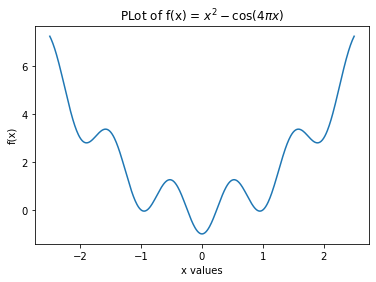

In [56]:
energy_function1 = lambda x: x**2 - np.cos(2 * np.pi * x)
x = np.linspace(-2.5, 2.5, 500)

plt.close(1);plt.figure(1)
plt.plot(x, energy_function1(x))
plt.xlabel('x values')
plt.ylabel('f(x)')
plt.title('PLot of f(x) = ${x^2 - \cos(4\pi x)}$')
plt.savefig('energy_function_1.svg')
plt.show()


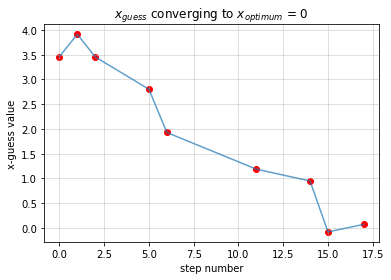

In [58]:
# Here we guessed the parameters through trial and error. 
# more thoroughly we could have done a parameter grid search
# futhermore, applying simmulated annealing to a real life problem would help "hone" in on valid parameter values. 

param1 = [20,1.1,25,20]
x_start1 = 2.
iter_num1, x_opt1, summary1 = simulated_annealing(energy_function1, x_start1, *param1).optimize()
x_opt1 = np.array(x_opt1).ravel()

plt.close(2);plt.figure(2)
plt.plot(iter_num1, x_opt1,alpha=0.7)
plt.scatter(iter_num1, x_opt1, color='r')
plt.grid(True, alpha=0.5)
plt.xlabel('step number')
plt.ylabel('x-guess value')
plt.title('${x_{guess}}$ converging to ${x_{optimum}}$ = 0')
plt.savefig('SM_energy_function1.svg')
plt.show()

In [51]:
summary1

,f(x),x current,x neighbor,acceptance prob,rand sample,temperature
Iteration,,,,,,
0,4.854585,2.2306561724633447,2.230656,0.9114,0.758486,2.000000e+01
1,3.342525,1.5415729928695903,1.541573,1.0000,0.198410,4.703768e+00
2,3.342525,1.5415729928695903,2.862539,0.0224,0.918443,1.106272e+00
3,3.342525,1.5415729928695903,2.610569,0.0000,0.368558,2.601822e-01
4,0.931193,1.1755731256695465,1.175573,1.0000,0.090155,6.119184e-02
5,-0.045351,0.9637669968823461,0.963767,1.0000,0.113340,1.439161e-02
6,-0.045351,0.9637669968823461,1.110613,0.0000,0.552245,3.384740e-03
7,-0.999214,-0.006158146710023349,-0.006158,1.0000,0.008878,7.960515e-04
8,-0.999214,-0.006158146710023349,0.927638,0.0000,0.458296,1.872221e-04


In [60]:
html_table1 = summary1.to_html()
table1 = open("table1.html", "w")
table1.write(html_table1)
table1.close()

## Exemple 2:

Optimize the energy functon f(t)=${t^2/2^t}$

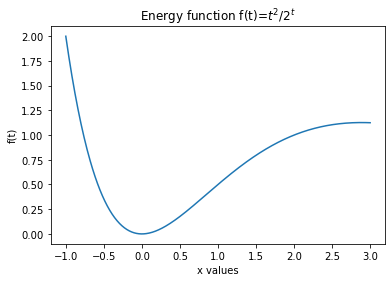

In [63]:
energy_function2 = lambda t: t**2/2**t
t = np.linspace(-1,3,500)

plt.close(3);plt.figure(3)
plt.plot(t, energy_function2(t))
plt.xlabel('x values')
plt.ylabel('f(t)')
plt.title('Energy function f(t)=${t^2/2^t}$')
plt.savefig('energy_function2.svg')
plt.show()

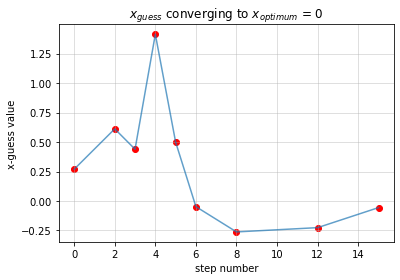

In [65]:
param2 = [20,1,12,20]
x_start2 = 1.
iter_num2, x_opt2, summary2 = simulated_annealing(energy_function2, x_start2, *param2).optimize()
x_opt2 = np.array(x_opt2).ravel()

plt.close(2);plt.figure(2)
plt.plot(iter_num2, x_opt2,alpha=0.7)
plt.scatter(iter_num2, x_opt2, color='r')
plt.grid(True, alpha=0.5)
plt.xlabel('step number')
plt.ylabel('x-guess value')
plt.title('${x_{guess}}$ converging to ${x_{optimum}}$ = 0')
plt.savefig('SM_energy_function2.svg')
plt.show()

In [55]:
summary2

,f(x),x current,x neighbor,acceptance prob,rand sample,temperature
Iteration,,,,,,
0,0.578874,1.1227484119591924,1.122748,0.9961,0.528641,20.000000
1,0.945500,1.839539300561916,1.839539,0.9661,0.244678,10.635031
2,0.942682,1.8320075957107445,1.832008,1.0000,0.148503,5.655194
3,1.062116,2.239805360812379,2.239805,0.9611,0.517277,3.007158
4,0.948902,1.8487144839832101,1.848714,1.0000,0.931831,1.599061
5,0.728637,1.374462897717327,1.374463,1.0000,0.848157,0.850303
6,0.928437,1.794849075591976,1.794849,0.6428,0.625345,0.452150
7,0.741455,1.3977202222909975,1.397720,1.0000,0.916167,0.240431
8,0.302535,0.7013854040779653,0.701385,1.0000,0.167346,0.127850


In [62]:
html_table2 = summary2.to_html()
table2 = open("table2.html", "w")
table2.write(html_table2)
table2.close()